# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from skimage.io import imread, imshow
from skimage import transform, img_as_float
import glob
import math

In [2]:
#get  current directory
cwd = os.getcwd()

In [3]:
#open data from current directory. Should work with any direcotry path
with open(os.path.join(cwd, "data", "train.csv")) as file:
    tagged_df = pd.read_csv(file)
tagged_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
#split the tags into new rows
tagged_df = pd.DataFrame(tagged_df.tags.str.split(' ').tolist(), index=tagged_df.image_name).stack()
tagged_df = tagged_df.reset_index()[[0, 'image_name']] # dataframe with two columns
tagged_df.columns = ['tags', 'image_name'] # rename columns
tagged_df.set_index('image_name', inplace=True) # rest index to image_name again

#create dummy variables for each tag
tagged_df = pd.get_dummies(tagged_df['tags']) # creates dummy rows
tagged_df = tagged_df.groupby(tagged_df.index).sum() # adds dummy rows together by image_name index
tagged_df.head()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
image_name,,,,,,,,,,,,,,,,,
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_10,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
train_100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
train_1000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


There are 17 unique tags in this data


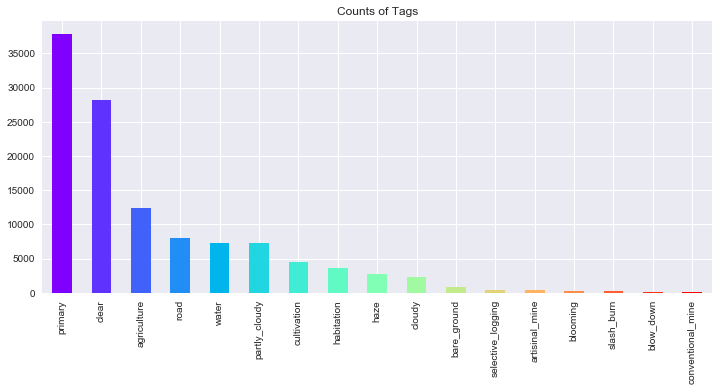

primary              37840
clear                28203
agriculture          12338
road                  8076
water                 7262
partly_cloudy         7251
cultivation           4547
habitation            3662
haze                  2695
cloudy                2330
bare_ground            859
selective_logging      340
artisinal_mine         339
blooming               332
slash_burn             209
blow_down              101
conventional_mine      100
dtype: int64

In [5]:
#Barplot of tag counts
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
print('There are {} unique tags in this data'.format(len(tagged_df.columns)))
colors = cm.rainbow(np.linspace(0, 1, len(tagged_df.columns)))
tagged_df.sum().sort_values(ascending=False).plot(title="Counts of Tags", color=colors, kind='bar')
plt.show()
tagged_df.sum().sort_values(ascending=False)

# Load Image Data

In [6]:
def load_training_data(ftype='jpg'):
    train_imgs = []
    labels = []
    im_names = []
    print('Loading {} image dataset'.format(ftype))
    path = os.path.join('data','train-{}-sample'.format(ftype),'*.'+ftype)
    files = glob.glob(path)
    for fs in files:
        img = imread(fs)
        # img = transform.resize(img, output_shape=(h,w,d), preserve_range=True)  if needed
        train_imgs.append(img)
        
        imname = os.path.basename(fs).split('.')[0]
        im_names.append(imname)
        
        labels_temp = tagged_df.loc[imname]
        labels.append(labels_temp)
        
        
        
    train_imgs = np.asarray(train_imgs)
    return train_imgs, labels, im_names

In [7]:
X_train, y_train, names_train = load_training_data()

Loading jpg image dataset


In [8]:
# 100 files, images are 256x256 pixels, with a channel dimension size 3 = RGB
print('X_train is a {} object'.format(type(X_train)))
print('it has shape {}'.format(X_train.shape))

X_train is a <class 'numpy.ndarray'> object
it has shape (100, 256, 256, 3)


In [9]:
print('y_train is a {} object'.format(type(y_train)))
print('it has {} elements'.format(len(y_train)))
print('each element is of type {}'.format(type(y_train[0])))
print('and the elements are of size {}'.format(y_train[0].shape))

y_train is a <class 'list'> object
it has 100 elements
each element is of type <class 'pandas.core.series.Series'>
and the elements are of size (17,)


In [10]:
print('names_train is a {} object'.format(type(names_train)))
print('it has {} elements'.format(len(names_train)))
print('each element is of type {}'.format(type(names_train)))

names_train is a <class 'list'> object
it has 100 elements
each element is of type <class 'list'>


In [11]:
def get_labels(fname):
    return ", ".join(tagged_df.loc[fname][tagged_df.loc[fname]==1].index.tolist())    

In [12]:
def plot_samples(nrow, ncol):
    sampling = np.random.randint(low=0, high=X_train.shape[0]-1, size = nrow*ncol)
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 12))
    for i in range(0,len(sampling)):
        name = names_train[sampling[i]]
        tags = get_labels(name)

        row = math.floor(i/ncol)
        col = i - math.floor(i/ncol)*ncol
        if (nrow == 1 or ncol == 1):
            ind = (max(row,col))
        else:
            ind = (row,col)
        axes[ind].imshow(X_train[sampling[i]])
        axes[ind].set_title(name+'\n'+tags)
        axes[ind].tick_params(left=False, right=False)
        axes[ind].set_yticklabels([])
        axes[ind].set_xticklabels([])
    plt.tight_layout()

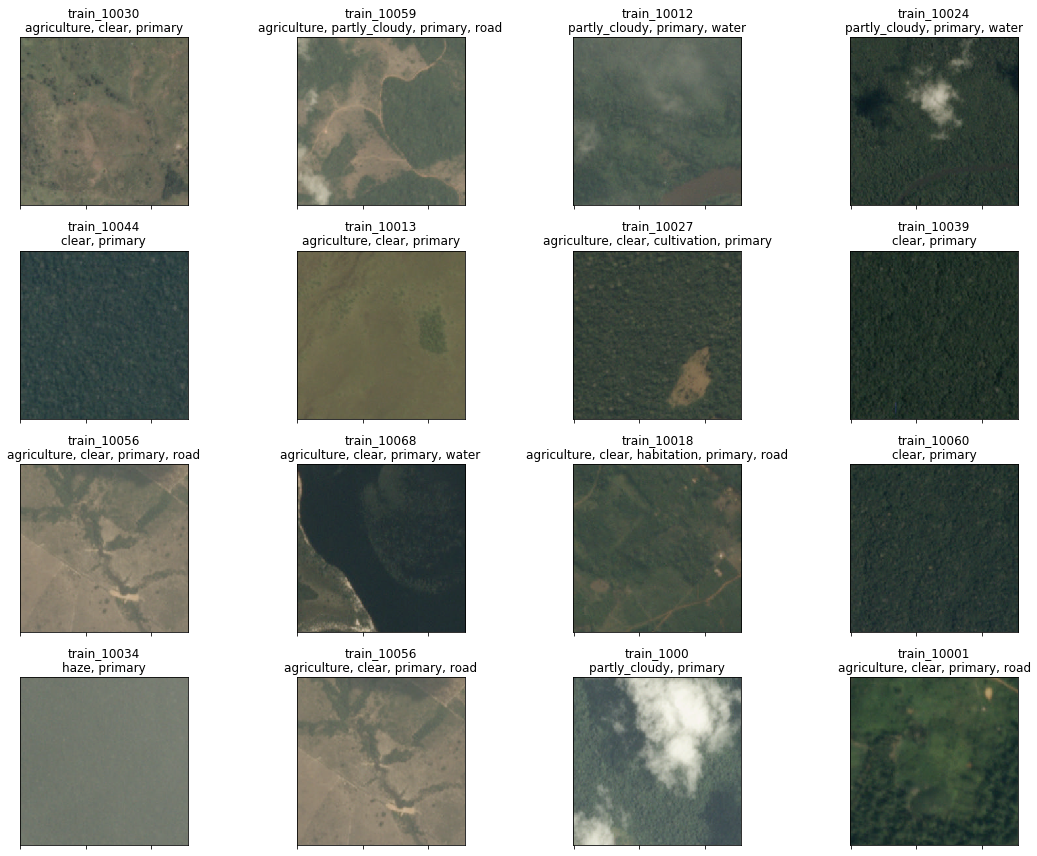

In [71]:
plot_samples(4,4)

In [13]:
X_train[0,:,:,2]

array([[105, 102, 101, ..., 103, 103, 103],
       [102, 100, 100, ..., 102, 103, 103],
       [100,  99,  99, ..., 101, 102, 102],
       ..., 
       [108, 107, 107, ..., 106, 106, 102],
       [107, 107, 106, ..., 105, 105, 101],
       [106, 105, 105, ..., 104, 103,  98]], dtype=uint8)

In [14]:
'train_10'

'train_10'

# Feature Engineering
What type of features are we working with here?

In [15]:
print("There are {} unique features per image".format((256*256)*3))

There are 196608 unique features per image


In [53]:
def make_raw_pixel_features():
    red = X_train[:,:,:,0].reshape(100, 256*256) # row of red pixel features for all images
    green = X_train[:,:,:,1].reshape(100, 256*256) # row of blue pixel features for all images
    blue = X_train[:,:,:,2].reshape(100, 256*256) #row of green pixel features for all images

    #Format as one dataframe with 196608 features.
    #one row of features for each image
    red = pd.DataFrame(red, index=names_train)
    red.columns = ['red_' + str(x) for x in range(0,256*256)] #create column names
    red.reset_index(inplace=True) #set index for the merge later on
    green = pd.DataFrame(green, index=names_train)
    green.columns = ['green_' + str(x) for x in range(0,256*256)]
    green.reset_index(inplace=True)
    blue = pd.DataFrame(blue, index=names_train)
    blue.columns = ['blue_' + str(x) for x in range(0,256*256)]
    blue.reset_index(inplace=True)

    #Merge into one large dataframe
    X_train_rows = pd.merge(red, green, on='index')
    X_train_rows = pd.merge(X_train_rows, blue, on='index').set_index('index')
    return X_train_rows

In [ ]:
X_train_rows = make_raw_pixel_features()
X_train_rows.head()

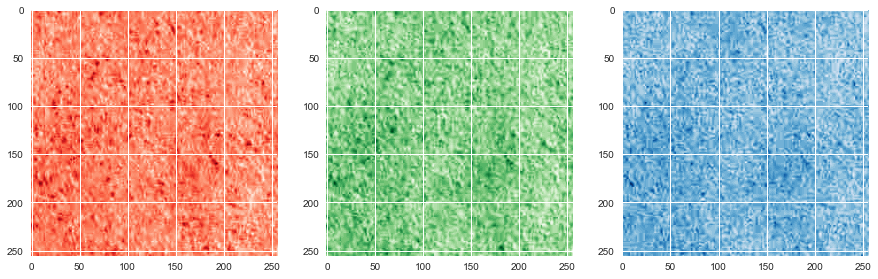

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))
axes[0].imshow(X_train[0,:,:,0], cmap='Reds')
axes[1].imshow(X_train[0,:,:,1], cmap='Greens')
axes[2].imshow(X_train[0,:,:,2], cmap='Blues')

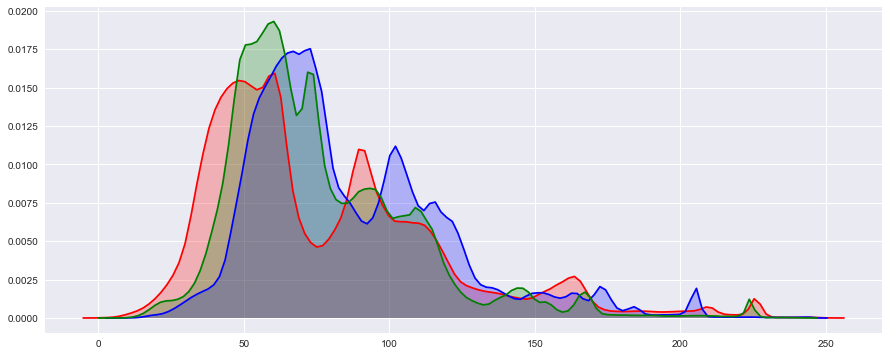

In [74]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.kdeplot(X_train[:,:,:,0].flatten(), ax=ax, shade=True, color='red')
sns.kdeplot(X_train[:,:,:,1].flatten(), ax=ax, shade=True, color='blue')
sns.kdeplot(X_train[:,:,:,2].flatten(), ax=ax, shade=True, color='green')